<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Tarea%202/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 8 derivación:
Es posible construir una aproximación de orden $\sigma (h^2)$ para la derivada progresiva.  Para tal proposito, se escribe el polinomio de interpolacion de grado 2 para el conjunto soporte
$Ω ={(x0,f(x_0)),(x_1,f(x_1)),(x_2,f(x_2))}$ y posteriormente se calcula la derivada de este polinomio.

**c)   Para f(x)   =$\sqrt{tan(x)}$  estimar  la  derivada  progresiva  de  orden $\sigma$ $(h^2)$ (expresión anterior) en el intervalo [0.1,1.1] con h= 0.01.**


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
h=0.01
valores_x=np.linspace(0.1,1.1,100)

def f(x):
    return np.sqrt(np.tan(x))

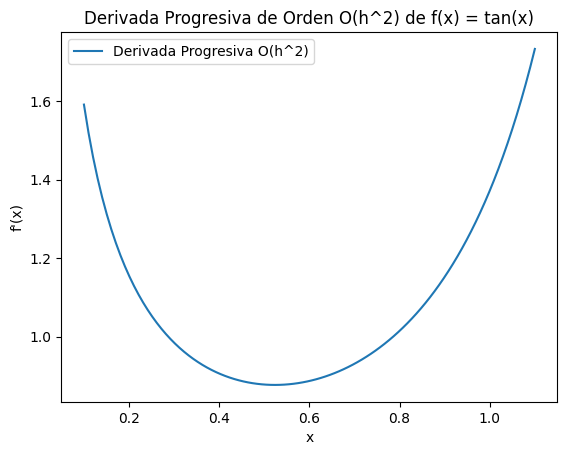

In [27]:
def derivada_progresiva(f,x,h):
    return (1/(2*h))*(-3*f(x)+4*f(x+h)-f(x+(2*h)))
valores_der_prog=derivada_progresiva(f,valores_x,h)

plt.plot(valores_x, valores_der_prog, label="Derivada Progresiva O(h^2)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Derivada Progresiva de Orden O(h^2) de f(x) = tan(x)")
plt.legend()
plt.show()

**d) Para f(x)  = $\sqrt{tan(x)}$  
estimar  la  derivada  central  de  orden $\sigma {(h^2)}$  en  el intervalo [0.1,1.1] con h= 0.01**

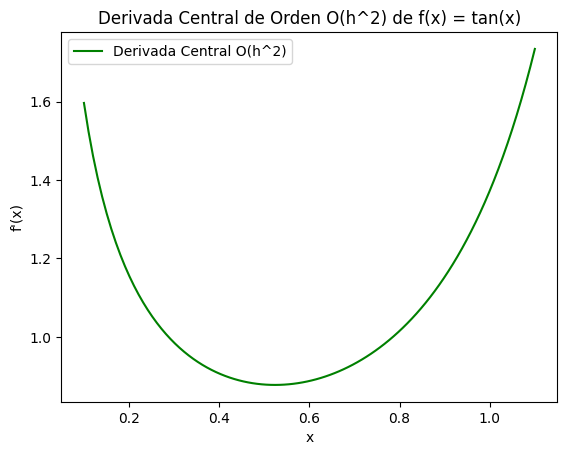

In [28]:
def der_central(f,x,h):
    return (((f(x+h))-(f(x-h)))/(2*h))
valores_der_central=der_central(f,valores_x,h)
plt.plot(valores_x, valores_der_central, label="Derivada Central O(h^2)", color="green")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Derivada Central de Orden O(h^2) de f(x) = tan(x)")
plt.legend()
plt.show()

**e) Calcule  analíticamente  la  derivada  de  la  función f(x),  y  grafique  con  la  estimación central y progresiva de orden $\sigma{(h^2)}$**

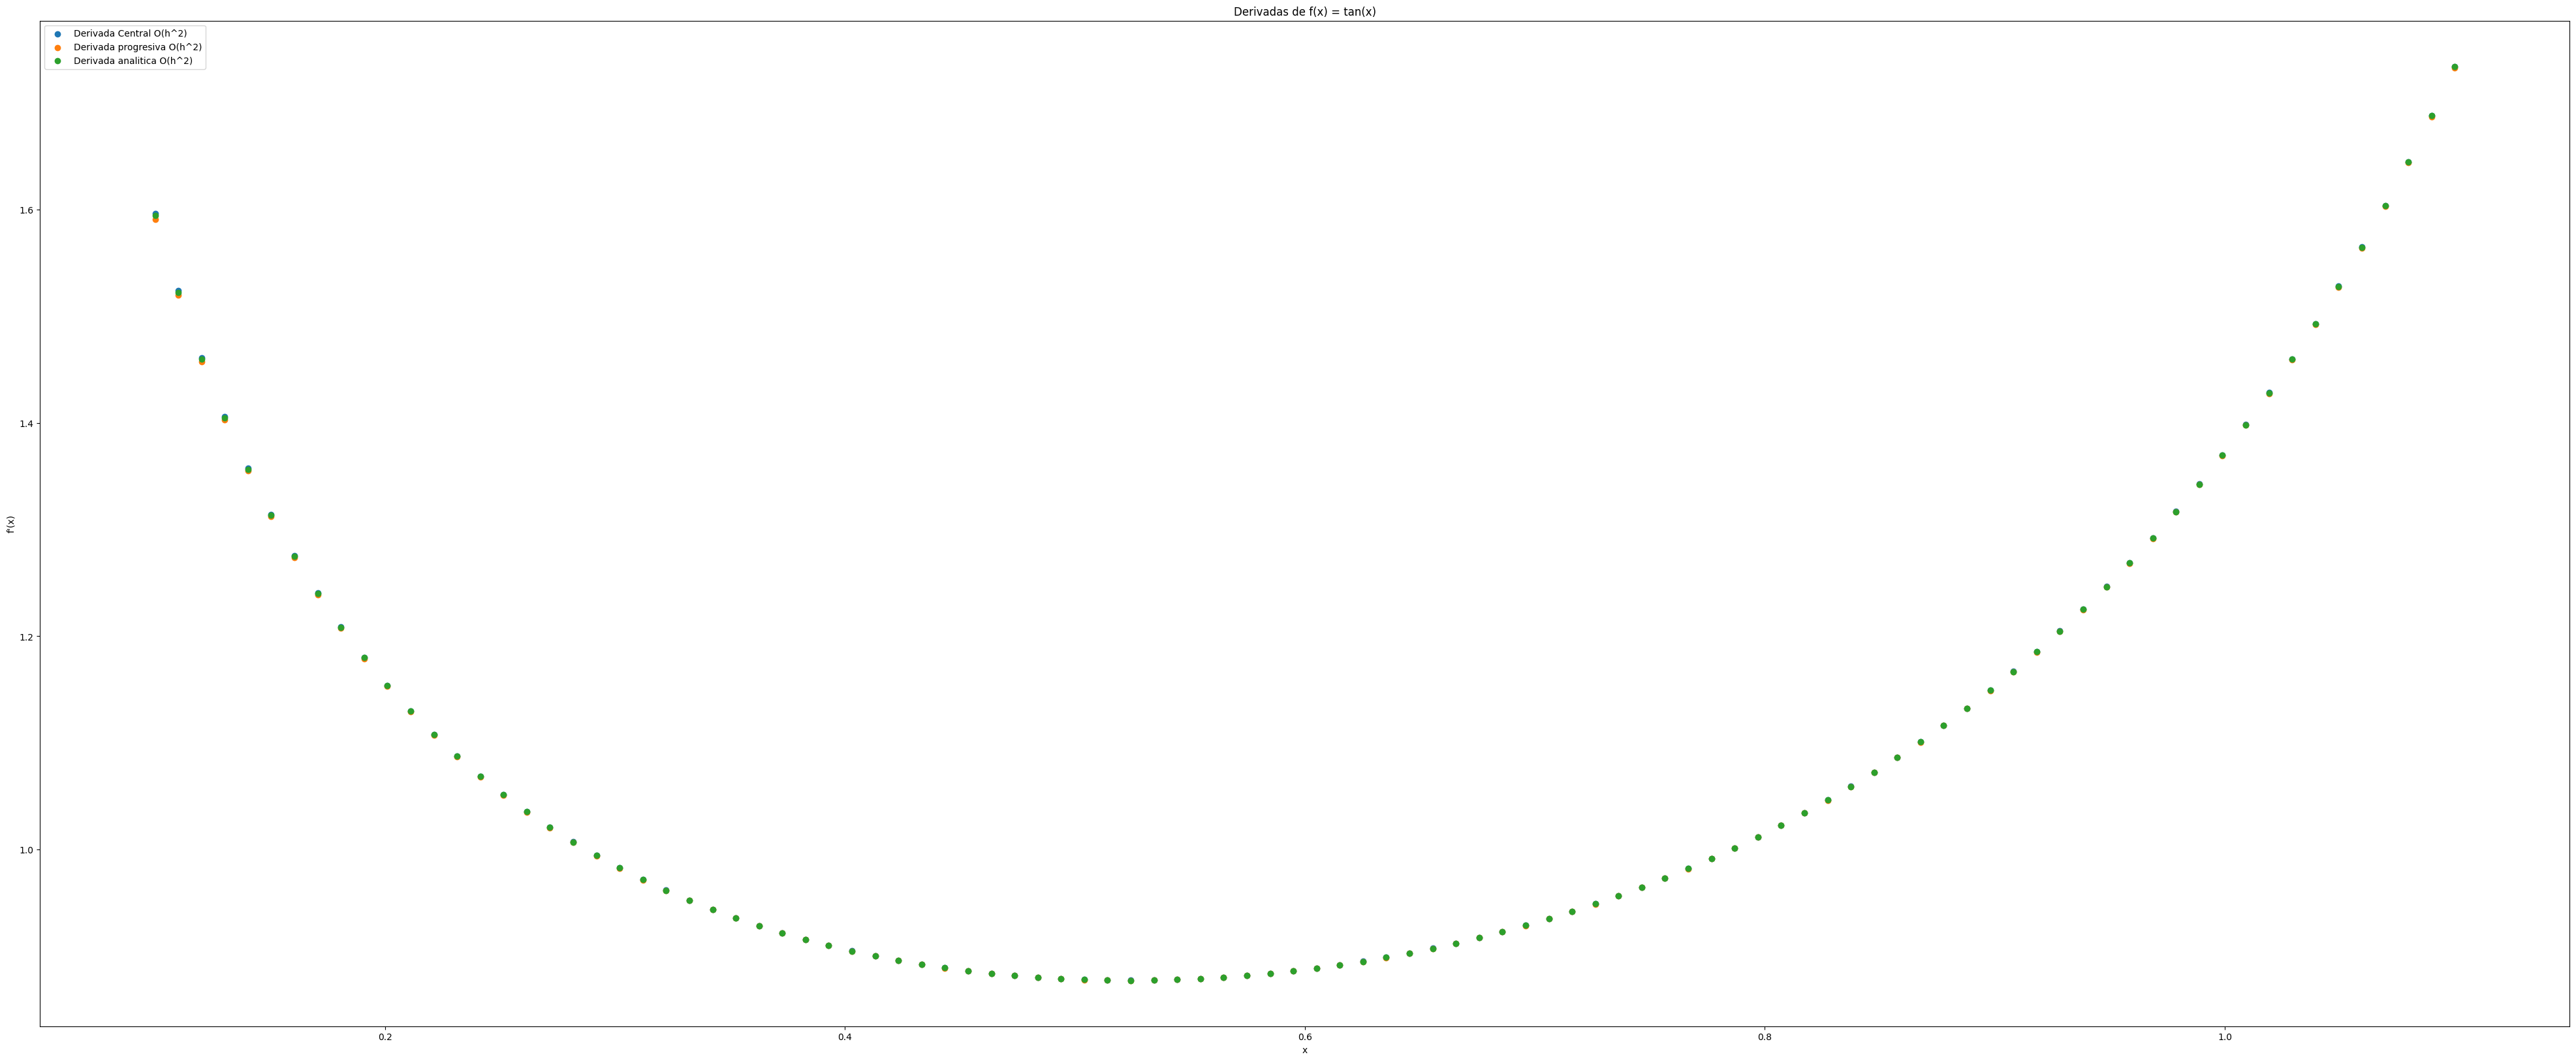

In [29]:
def der_analitica (x):
    return (1/(2*np.sqrt(np.tan(x))))*(1/(np.cos(x)**2))

valores_der_analitica=der_analitica(valores_x)

plt.figure(figsize=(50,20))
plt.scatter(valores_x, valores_der_central, label="Derivada Central O(h^2)")
plt.scatter(valores_x, valores_der_prog, label="Derivada progresiva O(h^2)")
plt.scatter(valores_x, valores_der_analitica, label="Derivada analitica O(h^2)")

plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Derivadas de f(x) = tan(x)")
plt.legend()
plt.show()

**f)  Grafique el error nodal para ambas aproximaciones.  ¿Tienen efectivamente el mismo orden de precisión ambos resultados?**

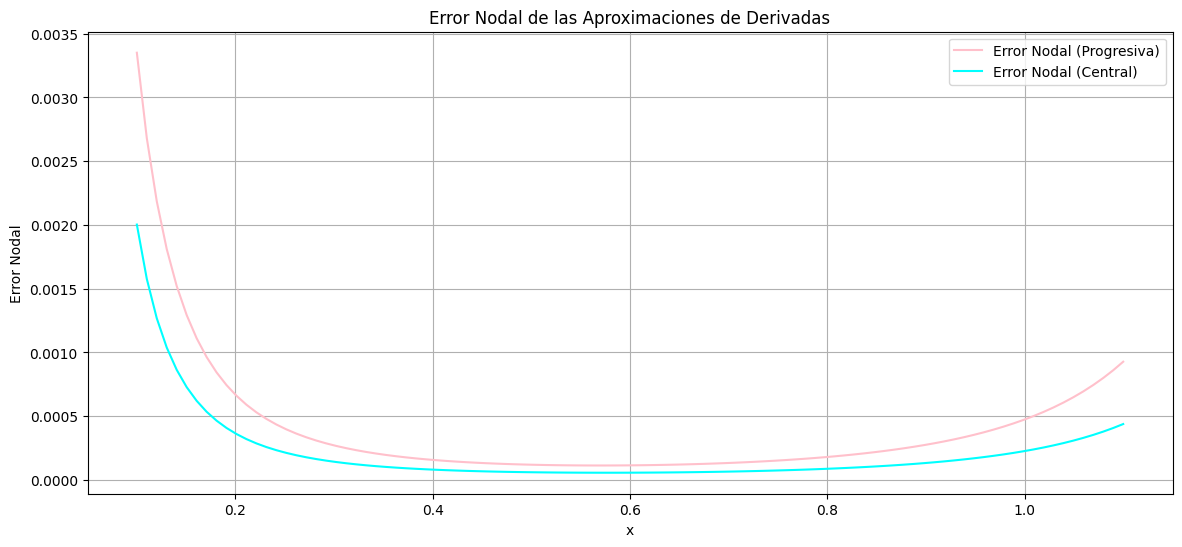

In [30]:
def error_nodal_progresiva(f,x,h):
    return np.abs((valores_der_prog-valores_der_analitica))

def error_nodal_central(f,x,h):
    return np.abs((valores_der_central-valores_der_analitica))

plt.figure(figsize=(14, 6))

plt.plot(valores_x, error_nodal_progresiva(valores_der_prog, valores_der_analitica,0.01), label='Error Nodal (Progresiva)', color='pink')
plt.plot(valores_x, error_nodal_central(valores_der_central, valores_der_analitica,0.01), label='Error Nodal (Central)', color='aqua')

plt.xlabel('x')
plt.ylabel('Error Nodal')
plt.title('Error Nodal de las Aproximaciones de Derivadas')
plt.legend()
plt.grid(True)
plt.show()


A pesar de que observamos que la derivada central tiendo más a 0, las dos derivadas efectivamente tienen orden $\sigma{(h^2)}$ dado que los errores observados para la derivada progresiva y central disminuyen de forma similar cuando el paso es pequeño. Además, es importante recalcar que la derivada central generalmente tiene un error menor que la derivada progresiva en todo el intervalo, lo que sugiere que es una aproximación más precisa.

#Ejercicios de Interpolación de Lagrange:


#Punto 3
*   También está hecho a mano


 ¿Con  que  grado  de  exactitud  podemos  calcular √114  mediante  la  interpolación de Lagrange para la función f(x)=√x, si elegimos los puntos $x_0= 100, x_1= 121, x_2= 144.$

$ Rta:|E|≃1.8×10^{−3}$.


In [33]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

X=np.array([100,121,144])
Y=np.array([10,11,12])

x=sym.Symbol('x', real="True")

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L
L0 = Lagrange(x,X,0)

x_valor=114
#aprox=Lagrange(x_valor,X,0)
def Interpolate(x,X,Y):
  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly
error_absoluto = np.abs(Interpolate(x_valor, X, Y) - np.sqrt(x_valor))
print(error_absoluto)
print(f"{error_absoluto:.2e}")

0.0011889239680691333
1.19e-03


#Punto 4

 En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posicionesen metros respecto al arma homicida, tome:
$(\vec{g}=−9.8m/s^2j)$
https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv
 . Estime el vector velocidad inicial, que estaría definido por la magnitud y dirección.  $Rpta:V_0= 10m/s\ y \ θ= 20^◦$.

 Hint:Encuentre el término lineal y cuadráico de la interpolación y compare con la ecuación de trayectoria de la bala.

In [34]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
#data = np.loadtxt(url)

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
data = np.loadtxt(url, delimiter=',', skiprows=1)
data

X=np.array(data[:,0])
Y=np.array(data[:,1])

x=sym.Symbol('x', real="True")


def Lagrange(x,X,i):
  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

def Interpolate(x,X,Y):
  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [35]:
poly=Interpolate(x,X,Y)
poly=poly.expand()
poly

-0.0554912422401579*x**2 + 0.363970234266202*x

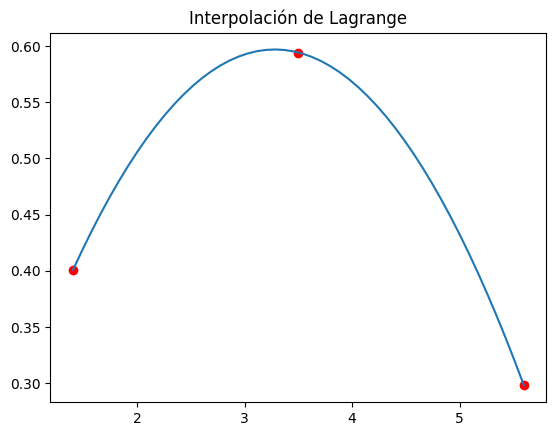

In [36]:
x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)
plt.scatter(X,Y,color='r')
plt.title('Interpolación de Lagrange')
plt.plot(x1,y1)

In [37]:
# Hallar v_0 y theta  :   trayectoria de proyectil:  y(x)= tanθ*x - (g/(2* v_0**2 * cos**2(θ)))* x**2
termino_lineal=float(poly.coeff(x,1))
termino_cuadratico=float(poly.coeff(x,2))

In [38]:
theta=np.arctan(termino_lineal)
g=9.8
pi=3.14159265
v_0=np.sqrt(g/((2*np.cos(theta)**2) * np.abs(termino_cuadratico)))
theta_g=theta*(180/pi)

print(f"v_0 = {v_0:.10f} m/s")
print(f"θ = {theta_g:.10f}°")


v_0 = 10.0000000000 m/s
θ = 20.0000000229°
